In [ ]:
import numpy as np
import pandas as pd
import os
import re
import nltk

from nltk.tokenize import word_tokenize

# Install the NLTK package
!pip install nltk

# Download necessary NLTK data
nltk.download('punkt')

# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# data processing, CSV file I/O (e.g. pd.read_csv)
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#load training data
traindf=pd.read_csv('TEC.csv',encoding='utf-8',sep="\t")

#load testing data
devdf=pd.read_csv('goemotions_full.csv',encoding='utf-8',sep="\t")

#load testing data
testdf=pd.read_csv('semeval2018-task1-emoc.csv',encoding='utf-8',sep="\t")

In [ ]:
# Display column names
print("Training data columns:", traindf.columns)
print("Development data columns:", devdf.columns)
print("Testing data columns:", testdf.columns)

Training data columns: Index(['tid,text,emotion'], dtype='object')
Development data columns: Index([',text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral'], dtype='object')
Testing data columns: Index(['catg,tid,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust'], dtype='object')


In [ ]:
# Display first 10 rows of each dataframe to check data structure
print("Training data sample:")
print(traindf.head(10))

Training data sample:
                                    tid,text,emotion
0  145353048817012736,Thinks that @melbahughes ha...
1  144279638024257536,"Como una expresión tan sim...
2  140499585285111809,the moment when you get ano...
3  145207578270507009,Be the greatest dancer of y...
4  139502146390470656,eww.. my moms starting to m...
5  146042696899887106,If ur heart hurts all the t...
6  145492569609084928,"I feel awful, and it's way...
7  145903955229151232,So chuffed for safc fans! B...
8  142717613234069504,Making art and viewing art ...
9  144183822873927680,"Soooo dooowwwn!! Move on, ...


In [ ]:
print("Development data sample:")
print(devdf.head(10))

Development data sample:
  ,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0  0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,...                                                                                                                                                                                                                                                                                            
1  1," >sexuality shouldn’t be a grouping categor...                                                                                                                                                                                                                                                         

In [ ]:
print("Testing data sample:")
print(testdf.head(10))

Testing data sample:
  catg,tid,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0  trng,2017-En-21441,“Worry is a down payment on...                                              
1  trng,2017-En-31535,Whatever you decide to do m...                                              
2  trng,2017-En-21068,"@Max_Kellerman  it also he...                                              
3  trng,2017-En-31436,Accept the challenges so th...                                              
4  trng,2017-En-22195,My roommate: it's okay that...                                              
5  trng,2017-En-22190,No but that's so cute. Atsu...                                              
6  trng,2017-En-20221,Do you think humans have th...                                              
7  trng,2017-En-22180,"Rooneys fucking untouchabl...                                              
8  trng,2017-En-41344,it's pretty depressing when...                                    

# PREPROCESSING

In [ ]:
# Extract hashtags from training data
if 'Tweet' in traindf.columns:
    traindf["hashtags"] = traindf["Tweet"].apply(lambda x: re.findall(r"#(\w+)", x))
else:
    print("Column 'Tweet' not found in training data")

# Extract hashtags from development data
if 'Tweet' in devdf.columns:
    devdf["hashtags"] = devdf["Tweet"].apply(lambda x: re.findall(r"#(\w+)", x))
else:
    print("Column 'Tweet' not found in development data")

# Extract hashtags from testing data
if 'Tweet' in testdf.columns:
    testdf["hashtags"] = testdf["Tweet"].apply(lambda x: re.findall(r"#(\w+)", x))
else:
    print("Column 'Tweet' not found in testing data")

Column 'Tweet' not found in training data
Column 'Tweet' not found in development data
Column 'Tweet' not found in testing data


In [ ]:
#display first rows in training data
traindf.head(10)

,"tid,text,emotion"
0,"145353048817012736,Thinks that @melbahughes ha..."
1,"144279638024257536,""Como una expresión tan sim..."
2,"140499585285111809,the moment when you get ano..."
3,"145207578270507009,Be the greatest dancer of y..."
4,"139502146390470656,eww.. my moms starting to m..."
5,"146042696899887106,If ur heart hurts all the t..."
6,"145492569609084928,""I feel awful, and it's way..."
7,"145903955229151232,So chuffed for safc fans! B..."
8,"142717613234069504,Making art and viewing art ..."
9,"144183822873927680,""Soooo dooowwwn!! Move on, ..."


In [ ]:
#display first rows in testing data
testdf.head(10)

,"catg,tid,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust"
0,"trng,2017-En-21441,“Worry is a down payment on..."
1,"trng,2017-En-31535,Whatever you decide to do m..."
2,"trng,2017-En-21068,""@Max_Kellerman it also he..."
3,"trng,2017-En-31436,Accept the challenges so th..."
4,"trng,2017-En-22195,My roommate: it's okay that..."
5,"trng,2017-En-22190,No but that's so cute. Atsu..."
6,"trng,2017-En-20221,Do you think humans have th..."
7,"trng,2017-En-22180,""Rooneys fucking untouchabl..."
8,"trng,2017-En-41344,it's pretty depressing when..."
9,"trng,2017-En-20759,@BossUpJaee but your pussy ..."


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 11.2 MB/s eta 0:00:00


In [ ]:
# Preprocess tweets training and testing
import emoji

# Translate emojis in training
if 'Tweet' in traindf.columns:
    traindf["clean"] = traindf["Tweet"].apply(lambda x: emoji.demojize(x))
else:
    print("Column 'Tweet' not found in training data")

# Translate emojis in development
if 'Tweet' in devdf.columns:
    devdf["clean"] = devdf["Tweet"].apply(lambda x: emoji.demojize(x))
else:
    print("Column 'Tweet' not found in development data")

# Translate emojis in testing
if 'Tweet' in testdf.columns:
    testdf["clean"] = testdf["Tweet"].apply(lambda x: emoji.demojize(x))
else:
    print("Column 'Tweet' not found in testing data")

Column 'Tweet' not found in training data
Column 'Tweet' not found in development data
Column 'Tweet' not found in testing data


In [ ]:
# Remove URLs in training data
if 'clean' in traindf.columns:
    traindf["clean"] = traindf["clean"].apply(lambda x: re.sub(r"http:\S+", '', x))
else:
    print("Column 'clean' not found in training data")

# Remove URLs in development data
if 'clean' in devdf.columns:
    devdf["clean"] = devdf["clean"].apply(lambda x: re.sub(r"http:\S+", '', x))
else:
    print("Column 'clean' not found in development data")

# Remove URLs in testing data
if 'clean' in testdf.columns:
    testdf["clean"] = testdf["clean"].apply(lambda x: re.sub(r"http:\S+", '', x))
else:
    print("Column 'clean' not found in testing data")

Column 'clean' not found in training data
Column 'clean' not found in development data
Column 'clean' not found in testing data


In [ ]:
# Tokenize the cleaned text in each dataframe
# Tokenize training tweets
if 'clean' in traindf.columns:
    traindf["clean"] = traindf["clean"].apply(lambda x: nltk.word_tokenize(str(x).lower()))
else:
    print("Column 'clean' not found in training data")

# Tokenize development tweets
if 'clean' in devdf.columns:
    devdf["clean"] = devdf["clean"].apply(lambda x: nltk.word_tokenize(str(x).lower()))
else:
    print("Column 'clean' not found in development data")

# Tokenize testing tweets
if 'clean' in testdf.columns:
    testdf["clean"] = testdf["clean"].apply(lambda x: nltk.word_tokenize(str(x).lower()))
else:
    print("Column 'clean' not found in testing data")

# Display the cleaned and tokenized data
print("Cleaned and tokenized training data sample:")
print(traindf.head(10))

print("Cleaned and tokenized development data sample:")
print(devdf.head(10))

print("Cleaned and tokenized testing data sample:")
print(testdf.head(10))


Column 'clean' not found in training data
Column 'clean' not found in development data
Column 'clean' not found in testing data
Cleaned and tokenized training data sample:
                                    tid,text,emotion
0  145353048817012736,Thinks that @melbahughes ha...
1  144279638024257536,"Como una expresión tan sim...
2  140499585285111809,the moment when you get ano...
3  145207578270507009,Be the greatest dancer of y...
4  139502146390470656,eww.. my moms starting to m...
5  146042696899887106,If ur heart hurts all the t...
6  145492569609084928,"I feel awful, and it's way...
7  145903955229151232,So chuffed for safc fans! B...
8  142717613234069504,Making art and viewing art ...
9  144183822873927680,"Soooo dooowwwn!! Move on, ...
Cleaned and tokenized development data sample:
  ,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,dis

In [ ]:
# Remove stopwords and punctuation
nltk.download('stopwords')
from nltk.corpus import stopwords
import string # load punctuation characters

# Ensure stopwords are downloaded
stopwrds = set(stopwords.words('english'))

# Remove stopwords and punctuation from training data
if 'clean' in traindf.columns:
    traindf["clean"] = traindf["clean"].apply(lambda x: [y for y in x if y not in stopwrds])
    traindf["clean"] = traindf["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']', '', y) for y in x])
    traindf["clean"] = traindf["clean"].apply(lambda x: [re.sub('\\n', '', y) for y in x])
else:
    print("Column 'clean' not found in training data")

# Remove stopwords and punctuation from development data
if 'clean' in devdf.columns:
    devdf["clean"] = devdf["clean"].apply(lambda x: [y for y in x if y not in stopwrds])
    devdf["clean"] = devdf["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']', '', y) for y in x])
    devdf["clean"] = devdf["clean"].apply(lambda x: [re.sub('\\n', '', y) for y in x])
else:
    print("Column 'clean' not found in development data")

# Remove stopwords and punctuation from testing data
if 'clean' in testdf.columns:
    testdf["clean"] = testdf["clean"].apply(lambda x: [y for y in x if y not in stopwrds])
    testdf["clean"] = testdf["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']', '', y) for y in x])
    testdf["clean"] = testdf["clean"].apply(lambda x: [re.sub('\\n', '', y) for y in x])
else:
    print("Column 'clean' not found in testing data")

# Display the cleaned and tokenized data
print("Cleaned and tokenized training data sample:")
print(traindf.head(10))

print("Cleaned and tokenized development data sample:")
print(devdf.head(10))

print("Cleaned and tokenized testing data sample:")
print(testdf.head(10))

Column 'clean' not found in training data
Column 'clean' not found in development data
Column 'clean' not found in testing data
Cleaned and tokenized training data sample:
                                    tid,text,emotion
0  145353048817012736,Thinks that @melbahughes ha...
1  144279638024257536,"Como una expresión tan sim...
2  140499585285111809,the moment when you get ano...
3  145207578270507009,Be the greatest dancer of y...
4  139502146390470656,eww.. my moms starting to m...
5  146042696899887106,If ur heart hurts all the t...
6  145492569609084928,"I feel awful, and it's way...
7  145903955229151232,So chuffed for safc fans! B...
8  142717613234069504,Making art and viewing art ...
9  144183822873927680,"Soooo dooowwwn!! Move on, ...
Cleaned and tokenized development data sample:
  ,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,dis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove stopwords and punctuation from testing data
if 'clean' in testdf.columns:
    testdf["clean"] = testdf["clean"].apply(lambda x: [y for y in x if y not in stopwrds])
    testdf["clean"] = testdf["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']', '', y) for y in x])
    testdf["clean"] = testdf["clean"].apply(lambda x: [re.sub('\\n', '', y) for y in x])
else:
    print("Column 'clean' not found in testing data")

# Clean unneeded spaces or empty columns or nonsense words
# Training data
if 'clean' in traindf.columns:
    traindf["clean"] = traindf["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip()) > 2])
else:
    print("Column 'clean' not found in training data")

# Development data
if 'clean' in devdf.columns:
    devdf["clean"] = devdf["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip()) > 2])
else:
    print("Column 'clean' not found in development data")

# Testing data
if 'clean' in testdf.columns:
    testdf["clean"] = testdf["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip()) > 2])
else:
    print("Column 'clean' not found in testing data")

# Display the cleaned and tokenized data
print("Cleaned and tokenized training data sample:")
print(traindf.head(10))

print("Cleaned and tokenized development data sample:")
print(devdf.head(10))

print("Cleaned and tokenized testing data sample:")
print(testdf.head(10))

Column 'clean' not found in testing data
Column 'clean' not found in training data
Column 'clean' not found in development data
Column 'clean' not found in testing data
Cleaned and tokenized training data sample:
                                    tid,text,emotion
0  145353048817012736,Thinks that @melbahughes ha...
1  144279638024257536,"Como una expresión tan sim...
2  140499585285111809,the moment when you get ano...
3  145207578270507009,Be the greatest dancer of y...
4  139502146390470656,eww.. my moms starting to m...
5  146042696899887106,If ur heart hurts all the t...
6  145492569609084928,"I feel awful, and it's way...
7  145903955229151232,So chuffed for safc fans! B...
8  142717613234069504,Making art and viewing art ...
9  144183822873927680,"Soooo dooowwwn!! Move on, ...
Cleaned and tokenized development data sample:
  ,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curios

In [ ]:
traindf.head(10)

,"tid,text,emotion"
0,"145353048817012736,Thinks that @melbahughes ha..."
1,"144279638024257536,""Como una expresión tan sim..."
2,"140499585285111809,the moment when you get ano..."
3,"145207578270507009,Be the greatest dancer of y..."
4,"139502146390470656,eww.. my moms starting to m..."
5,"146042696899887106,If ur heart hurts all the t..."
6,"145492569609084928,""I feel awful, and it's way..."
7,"145903955229151232,So chuffed for safc fans! B..."
8,"142717613234069504,Making art and viewing art ..."
9,"144183822873927680,""Soooo dooowwwn!! Move on, ..."


In [ ]:
# Display column names for each DataFrame
print("Training data columns:", traindf.columns)
print("Development data columns:", devdf.columns)
print("Testing data columns:", testdf.columns)

# List of columns to retain
columns_to_keep = ["clean", "hashtags", "anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"]

# Filter columns based on their presence in each DataFrame
traindf = traindf[[col for col in columns_to_keep if col in traindf.columns]]
devdf = devdf[[col for col in columns_to_keep if col in devdf.columns]]
testdf = testdf[[col for col in columns_to_keep if col in testdf.columns]]

# Display the first 10 rows of each cleaned DataFrame
print("Cleaned training data sample:")
print(traindf.head(10))

print("Cleaned development data sample:")
print(devdf.head(10))

print("Cleaned testing data sample:")
print(testdf.head(10))

# Save the cleaned DataFrames to CSV files
traindf.to_csv('cleaned_training_data.csv', index=False)
devdf.to_csv('cleaned_development_data.csv', index=False)
testdf.to_csv('cleaned_testing_data.csv', index=False)

print("Cleaned data has been saved.")

Training data columns: Index(['tid,text,emotion'], dtype='object')
Development data columns: Index([',text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral'], dtype='object')
Testing data columns: Index(['catg,tid,text,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust'], dtype='object')
Cleaned training data sample:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Cleaned development data sample:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Cleaned testing data sample:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Cleaned data has been saved.


In [ ]:
# Total tweets records
total_tweets = len(traindf)

In [ ]:
# Counting each emotion
emotions = ["anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "pessimism", "sadness", "surprise", "trust"]
emotion_counts = {}

for emotion in emotions:
    if emotion in traindf.columns:
        emotion_counts[emotion] = len(traindf[traindf[emotion] == 1])
    else:
        emotion_counts[emotion] = 0

# Create a DataFrame to display the counts
val_df = pd.DataFrame(emotion_counts, index=[0])
val_df["total_tweets"] = total_tweets  # Add total tweet count

# Reorder columns with total_tweets first
val_df = val_df[["total_tweets"] + emotions]

# Display the DataFrame
print(val_df)

   total_tweets  anger  anticipation  disgust  fear  joy  love  optimism  \
0         21051      0             0        0     0    0     0         0   

   pessimism  sadness  surprise  trust  
0          0        0         0      0  


<Axes: >

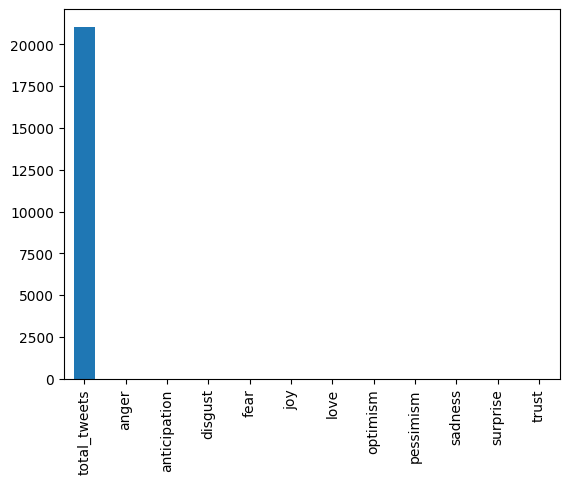

In [ ]:
val_df.iloc[0].plot(kind="bar")

In [ ]:
# Convert tokenized tweets to sentences if the "clean" column exists
if "clean" in traindf.columns:
    traindf["clean"] = traindf["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))
    devdf["clean"] = devdf["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))
    testdf["clean"] = testdf["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))

    # Verify column names and sample of the DataFrame
    print("Column names in traindf:", traindf.columns)
    print("Sample of traindf:")
    print(traindf.head())
else:
    print("Error: 'clean' column not found in the DataFrame.")

Error: 'clean' column not found in the DataFrame.


In [ ]:
traindf.head(10)

""
0
1
2
3
4
5
6
7
8
9


In [ ]:
testdf.head(10)

""
0
1
2
3
4
5
6
7
8
9


In [ ]:
#save clean tweets

#training data
traindf.to_csv("cleaned_TEC.csv",index=False,encoding="utf-8")

#develop data
devdf.to_csv("cleaned_goemotions_full.csv",index=False,encoding="utf-8")

#testing data
testdf.to_csv("cleaned_semeval2018-task1-emoc.csv",index=False,encoding="utf-8")